In [111]:
#import pylhe
import math
from pprint import *
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 150
import glob


In [124]:
df = pd.read_html("ee_tautauee/crossx.html",header=0)

df2 = df[0]
df3 = df2.drop(index=[0,1,2,3])  

In [144]:
df3.loc[9] = df3.loc[4]
df3 = df3.drop(index=4)

In [145]:
df3

,Run,Collider,Banner,Cross section (pb),Events,Data,Output,Action
5,run_04,e+ e- 45.6 x 45.6 GeV,tag_1,8.149 ± 0.022,10000,parton madevent,LHE,NaN
6,run_05,e+ e- 80.0 x 80.0 GeV,tag_1,6.833 ± 0.024,10000,parton madevent,LHE,NaN
7,run_06,e+ e- 120.0 x 120.0 GeV,tag_1,5.054 ± 0.022,10000,parton madevent,LHE,NaN
8,run_07,e+ e- 182.5 x 182.5 GeV,tag_1,3.274 ± 0.0085,10000,parton madevent,LHE,NaN
9,run_03_0,e+ e- 500.0 x 500.0 GeV,tag_1,0.7089 ± 0.0049,1080,parton madevent,LHE,NaN


In [149]:
labels = []
cross_sections = []
errors = []
coms = []
runs = []

for i in range(len(df3)):
    run = df3["Run"].iloc[i]
    name = df3["Collider"].iloc[i]
    com = float(df3["Collider"].iloc[i].split(" x ")[1][:-4])*2
    string = df3["Cross section (pb)"].iloc[i]
    cross_section, error = string.split(' ± ')
    labels += [name]
    cross_sections += [float(cross_section)]
    errors += [float(error)]
    coms  += [com]
    runs += [run]

Text(0,0.5,'$\\sigma$ [pb]')

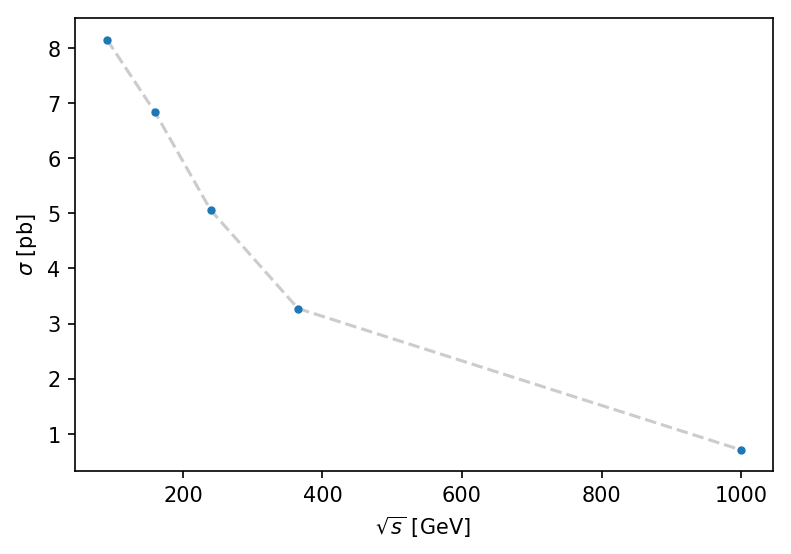

In [150]:
plt.errorbar(coms, cross_sections,yerr=errors,fmt=".")#fmt="none")
plt.plot(coms, cross_sections,"--",alpha=0.2,color="black")
plt.xlabel("$\sqrt{s}$ [GeV] ")
plt.ylabel("$\sigma$ [pb]")

In [163]:
# find cross-sections file
g_2_cross_sections = []
g_2_errors = []
for run in runs:
    df = pd.read_html("ee_tautauee/HTML/"+run+"/results.html",header=0)
    df2 = df[1]  
    df2.sort_values('Cross-Section',ascending=False)
    g_2_cross_section = float(df2[df2["Graph"] == "G18"]["Cross-Section"])
    g_2_error = float(df2[df2["Graph"] == "G18"]["Error"])
    g_2_cross_sections +=[g_2_cross_section]
    g_2_errors += [g_2_error]

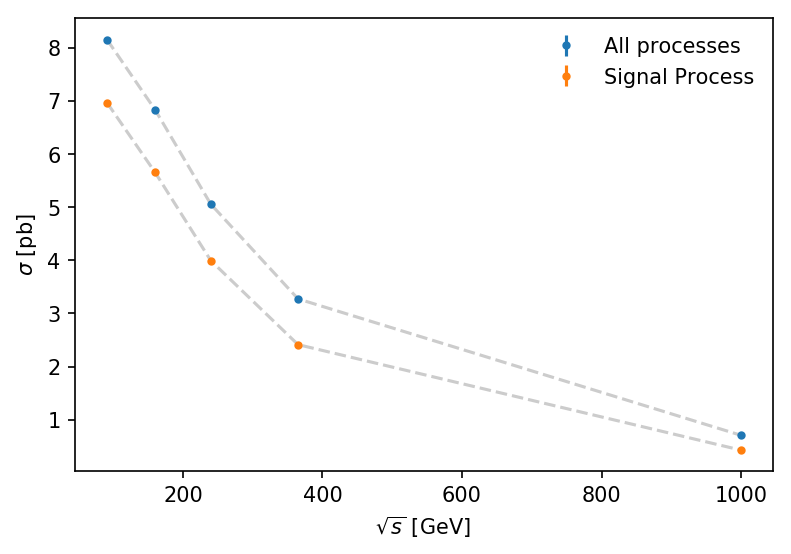

In [170]:
plt.errorbar(coms, cross_sections,yerr=errors,fmt=".",label="All processes")#fmt="none")
plt.plot(coms, cross_sections,"--",alpha=0.2,color="black")
plt.errorbar(coms, g_2_cross_sections,yerr=g_2_errors,fmt=".",label="Signal Process")#fmt="none")
plt.plot(coms, g_2_cross_sections,"--",alpha=0.2,color="black")
plt.xlabel("$\sqrt{s}$ [GeV] ")
plt.ylabel("$\sigma$ [pb]")
plt.legend(frameon = False)